In [1]:
pip install pandas numpy seaborn matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


# Importing Required Libraries

In [1]:
# Import necessary libraries for data manipulation, analysis, and visualization.
import pandas as pd               # For data manipulation and analysis
import numpy as np                # For numerical computations
import seaborn as sns             # For data visualization
import matplotlib.pyplot as plt   # For plotting graphs
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.linear_model import LogisticRegression  # Logistic Regression model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # For evaluating the model




# pandas: Provides data structures and data analysis tools.
# numpy: Supports large, multi-dimensional arrays and matrices.
# seaborn & matplotlib.pyplot: Used for creating various plots and visualizations.
# sklearn.model_selection.train_test_split: Splits the data into training and testing sets.
# sklearn.linear_model.LogisticRegression: Implements the logistic regression algorithm.
# sklearn.metrics: Contains functions to evaluate the model performance.

# Loading the Dataset

In [3]:
# Load the Titanic dataset from a CSV file into a DataFrame.
df = pd.read_csv(r'E:\titanic survival prediction.csv')

# Display the first five rows of the dataset.
df.head()




# pd.read_csv('titanic.csv'): Loads the dataset into a DataFrame.
# df.head(): Displays the first five rows to give an overview of the dataset.

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,Survived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


# Exploring the Data

In [5]:
# Check the shape of the DataFrame (number of rows and columns).
df.shape

# Display information about the DataFrame, including data types and non-null counts.
df.info()

# Get a statistical summary of the DataFrame.
df.describe()




# df.shape: Provides the number of rows and columns.
# df.info(): Shows data types and non-null counts for each column.
# df.describe(): Shows descriptive statistics for numerical features.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   zero         1309 non-null   int64  
 6   zero.1       1309 non-null   int64  
 7   zero.2       1309 non-null   int64  
 8   zero.3       1309 non-null   int64  
 9   zero.4       1309 non-null   int64  
 10  zero.5       1309 non-null   int64  
 11  zero.6       1309 non-null   int64  
 12  Parch        1309 non-null   int64  
 13  zero.7       1309 non-null   int64  
 14  zero.8       1309 non-null   int64  
 15  zero.9       1309 non-null   int64  
 16  zero.10      1309 non-null   int64  
 17  zero.11      1309 non-null   int64  
 18  zero.12      1309 non-null   int64  
 19  zero.1

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,Survived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.0,1309.0,1309.0,1309.0,1309.0,...,1309.0,1309.0,1309.0,1309.000000,1309.0,1309.0,1307.000000,1309.0,1309.0,1309.000000
mean,655.000000,29.503186,33.281086,0.355997,0.498854,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.294882,0.0,0.0,1.492731,0.0,0.0,0.261268
std,378.020061,12.905241,51.741500,0.478997,1.041658,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.837836,0.0,0.0,0.814626,0.0,0.0,0.439494
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
25%,328.000000,22.000000,7.895800,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.000000,0.0,0.0,1.000000,0.0,0.0,0.000000
50%,655.000000,28.000000,14.454200,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,0.000000
75%,982.000000,35.000000,31.275000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000
max,1309.000000,80.000000,512.329200,1.000000,8.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000


# Handling Missing Data

In [7]:
# Check for missing values in the dataset
df.isnull().sum()

# Fill missing values in the 'Age' column with the median value
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing values in the 'Embarked' column with the mode (most frequent value)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Check if the 'Cabin' column exists before attempting to drop it
if 'Cabin' in df.columns:
    df.drop('Cabin', axis=1, inplace=True)

# Verify that there are no more missing values
df.isnull().sum()




# df.isnull().sum(): Counts missing values in each column.
# fillna(): Replaces missing values in 'Age' with the median and in 'Embarked' with the mode.
# df.drop(): Removes the 'Cabin' column due to excessive missing values.

C:\Users\pradu\AppData\Local\Temp\ipykernel_18900\2436767148.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\pradu\AppData\Local\Temp\ipykernel_18900\2436767148.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
Pclass         0
zero.15        0
zero.16        0
Embarked       0
zero.17        0
zero.18        0
Survived       0
dtype: int64

# Converting Categorical Data into Numerical Data

In [9]:
# Convert categorical variables ('Sex' and 'Embarked') into numerical format using one-hot encoding.
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Display the first five rows of the modified DataFrame.
df.head()



# pd.get_dummies(): Converts categorical variables into binary columns.
# drop_first=True: Drops one category to avoid multicollinearity.

,Passengerid,Age,Fare,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,...,zero.14,Pclass,zero.15,zero.16,zero.17,zero.18,Survived,Sex_1,Embarked_1.0,Embarked_2.0
0,1,22.0,7.2500,1,0,0,0,0,0,0,...,0,3,0,0,0,0,0,False,False,True
1,2,38.0,71.2833,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,True,False,False
2,3,26.0,7.9250,0,0,0,0,0,0,0,...,0,3,0,0,0,0,1,True,False,True
3,4,35.0,53.1000,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,True,False,True
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,3,0,0,0,0,0,False,False,True


# Splitting the Data into Training and Testing Sets

In [11]:
# Define the feature variables (X) and the target variable (y).
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split the dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets.
X_train.shape, X_test.shape, y_train.shape, y_test.shape



# X = df.drop('Survived', axis=1): Features used for training.
# y = df['Survived']: Target variable.
# train_test_split(): Splits the data into training and testing sets.
# random_state=42: Ensures reproducibility.

((1047, 28), (262, 28), (1047,), (262,))

# Building the Logistic Regression Model

In [13]:
# Create an instance of the Logistic Regression model.
model = LogisticRegression()

# Train the model using the training data.
model.fit(X_train, y_train)

# Make predictions on the testing data.
y_pred = model.predict(X_test)

# Display the first five predictions.
y_pred[:5]



# LogisticRegression(max_iter=1000): Initializes the logistic regression model with a maximum of 1000 iterations.
# model.fit(X_train, y_train): Trains the model on the training data.
# model.predict(X_test): Predicts outcomes on the test set.
# y_pred[:5]: Displays the first five predictions.

D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, 0, 0], dtype=int64)

# Evaluating the Model

In [15]:
# Calculate the accuracy of the model.
accuracy = accuracy_score(y_test, y_pred)

# Display the accuracy of the model.
print(f'Accuracy: {accuracy * 100:.2f}%')

# Generate the confusion matrix.
conf_matrix = confusion_matrix(y_test, y_pred)

# Generate a classification report.
class_report = classification_report(y_test, y_pred)

# Display the confusion matrix and classification report.
conf_matrix, class_report


# accuracy_score(): Computes the accuracy of the model.
# confusion_matrix(): Creates a confusion matrix to evaluate the model's performance.
# classification_report(): Provides precision, recall, and F1-score metrics.

Accuracy: 85.11%


(array([[179,  10],
        [ 29,  44]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.86      0.95      0.90       189\n           1       0.81      0.60      0.69        73\n\n    accuracy                           0.85       262\n   macro avg       0.84      0.77      0.80       262\nweighted avg       0.85      0.85      0.84       262\n')

# Visualizing Data

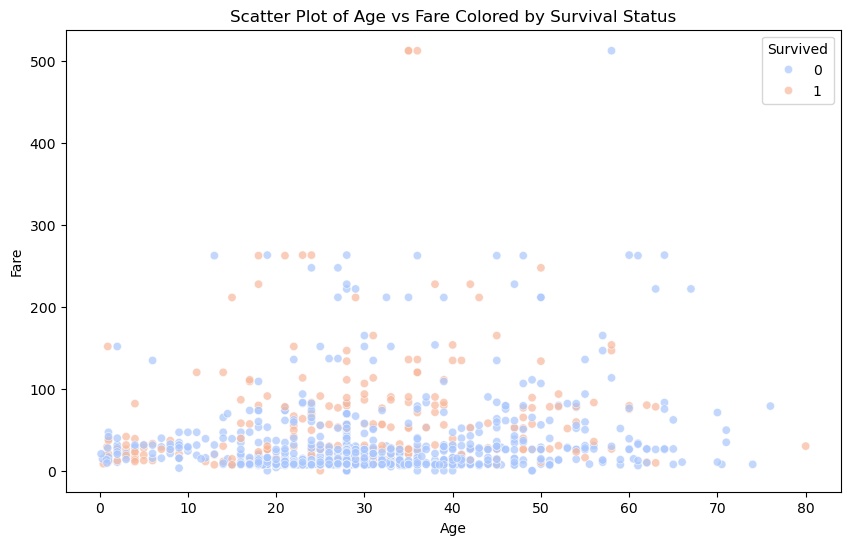

In [17]:
# Scatter plot to visualize the relationship between 'Age' and 'Fare' with survival status.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df, palette='coolwarm', alpha=0.7)
plt.title('Scatter Plot of Age vs Fare Colored by Survival Status')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived', loc='best')
plt.show()



# sns.scatterplot(): Creates a scatter plot of 'Age' vs 'Fare', colored by survival status.
# plt.title(), plt.xlabel(), plt.ylabel(): Adds title and axis labels.
# plt.legend(): Adds a legend to the plot.

# Plotting Feature Importances

<Figure size 1200x800 with 0 Axes>

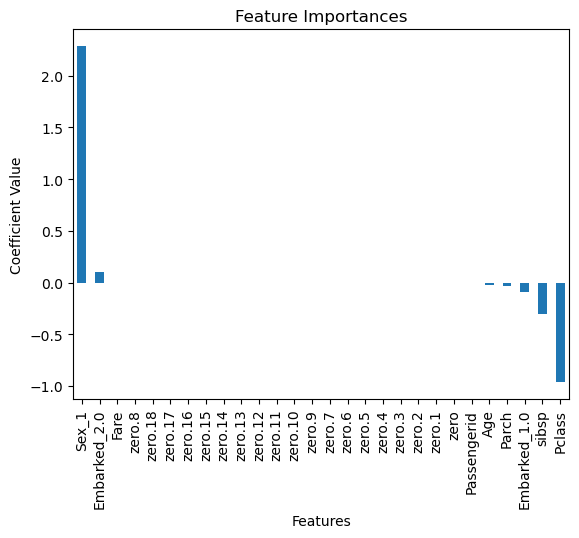

In [19]:
# Plot feature importances for the logistic regression model.
coefficients = pd.DataFrame(model.coef_[0], index=X.columns, columns=['Coefficient'])
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)

plt.figure(figsize=(12, 8))
coefficients.plot(kind='bar', legend=False)
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=90)
plt.show()



# model.coef_: Retrieves the coefficients of the features from the logistic regression model.
# pd.DataFrame(): Creates a DataFrame with feature names and their corresponding coefficients.
# plot(kind='bar'): Creates a bar plot of the feature importances.